# Exp 2: Image Intensity Transformations and Spatial Filtering #
## 1.	Aims ##

#### 1. Learn the method of contrast adjustment and histogram equalization.

#### 2. Learn how to display histograms of images.
    
#### 3. Learn how to perform spatial filtering.

## 2.	Steps and Requirements

### (1) Perform Contrast Adjustment.	
(a) Load the image 'beans.png'. 

(b) Stretch its graysacle to the range of [0,1]. (Tips: ``skimage.exposure.rescale_intensity``) 

(c) Shrink its grayscale to the range of [0.2,0.8]. (Tips: ``skimage.exposure.rescale_intensity``) 

(d) Obtain the negative image. (Tips: ``skimage.exposure.rescale_intensity``) 

(e) Perform log transformation. (Tips: ``skimage.exposure.adjust_log``)  

(f) Perform Gamma transformation with $\gamma=0.5$ and $\gamma=1.5$, respectively. (Tips: ``skimage.exposure.adjust_gamma``) 

Display the images with suitable titles. 

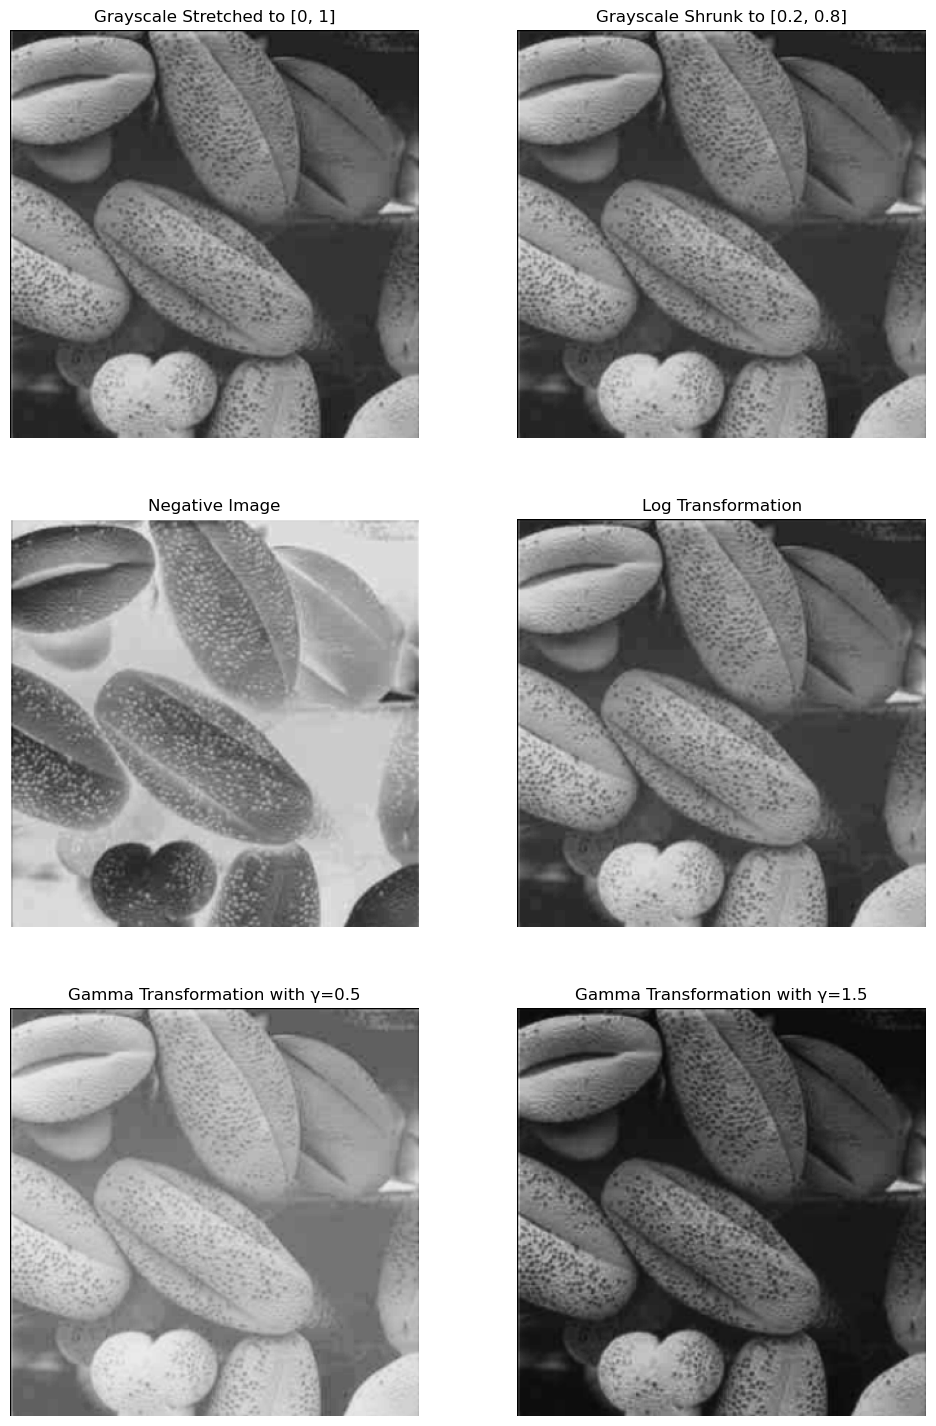

In [1]:
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

# (a) Load the image 'beans.png'.
image = io.imread(r"E:\Homework\images\beans.png", as_gray=True)  # Ensure it's loaded as grayscale

# (b) Stretch its grayscale to the range of [0,1].
stretched_image = exposure.rescale_intensity(image, out_range=(0, 1))

# (c) Shrink its grayscale to the range of [0.2,0.8].
shrunk_image = exposure.rescale_intensity(image, out_range=(0.2, 0.8))

# (d) Obtain the negative image.
negative_image = 1 - image  # Simple way to obtain negative if image is normalized [0, 1]

# (e) Perform log transformation.
log_transformed_image = exposure.adjust_log(image, gain=1)

# (f) Perform Gamma transformation with 𝛾=0.5 and 𝛾=1.5, respectively.
gamma_transformed_05 = exposure.adjust_gamma(image, gamma=0.5)
gamma_transformed_15 = exposure.adjust_gamma(image, gamma=1.5)

# Setting up plotting of the images
fig, ax = plt.subplots(3, 2, figsize=(12, 18))
ax[0, 0].imshow(stretched_image, cmap='gray')
ax[0, 0].set_title('Grayscale Stretched to [0, 1]')
ax[0, 0].axis('off')

ax[0, 1].imshow(shrunk_image, cmap='gray')
ax[0, 1].set_title('Grayscale Shrunk to [0.2, 0.8]')
ax[0, 1].axis('off')

ax[1, 0].imshow(negative_image, cmap='gray')
ax[1, 0].set_title('Negative Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(log_transformed_image, cmap='gray')
ax[1, 1].set_title('Log Transformation')
ax[1, 1].axis('off')

ax[2, 0].imshow(gamma_transformed_05, cmap='gray')
ax[2, 0].set_title('Gamma Transformation with γ=0.5')
ax[2, 0].axis('off')

ax[2, 1].imshow(gamma_transformed_15, cmap='gray')
ax[2, 1].set_title('Gamma Transformation with γ=1.5')
ax[2, 1].axis('off')

plt.show()

### (2) Compute and Display Image Histogram.	
(a) Compute the histogram of the original image and the histograms of the adjusted images above.
(<font style="color:red;"> Tips:``Matplotlib.pyplot.hist``or ``skimage.exposure.histogram(image, nbins=256)``</font>) 

(b) Display the histogram of the original image and the histograms of the adjusted images above. Use a suitlabe title for each figure.


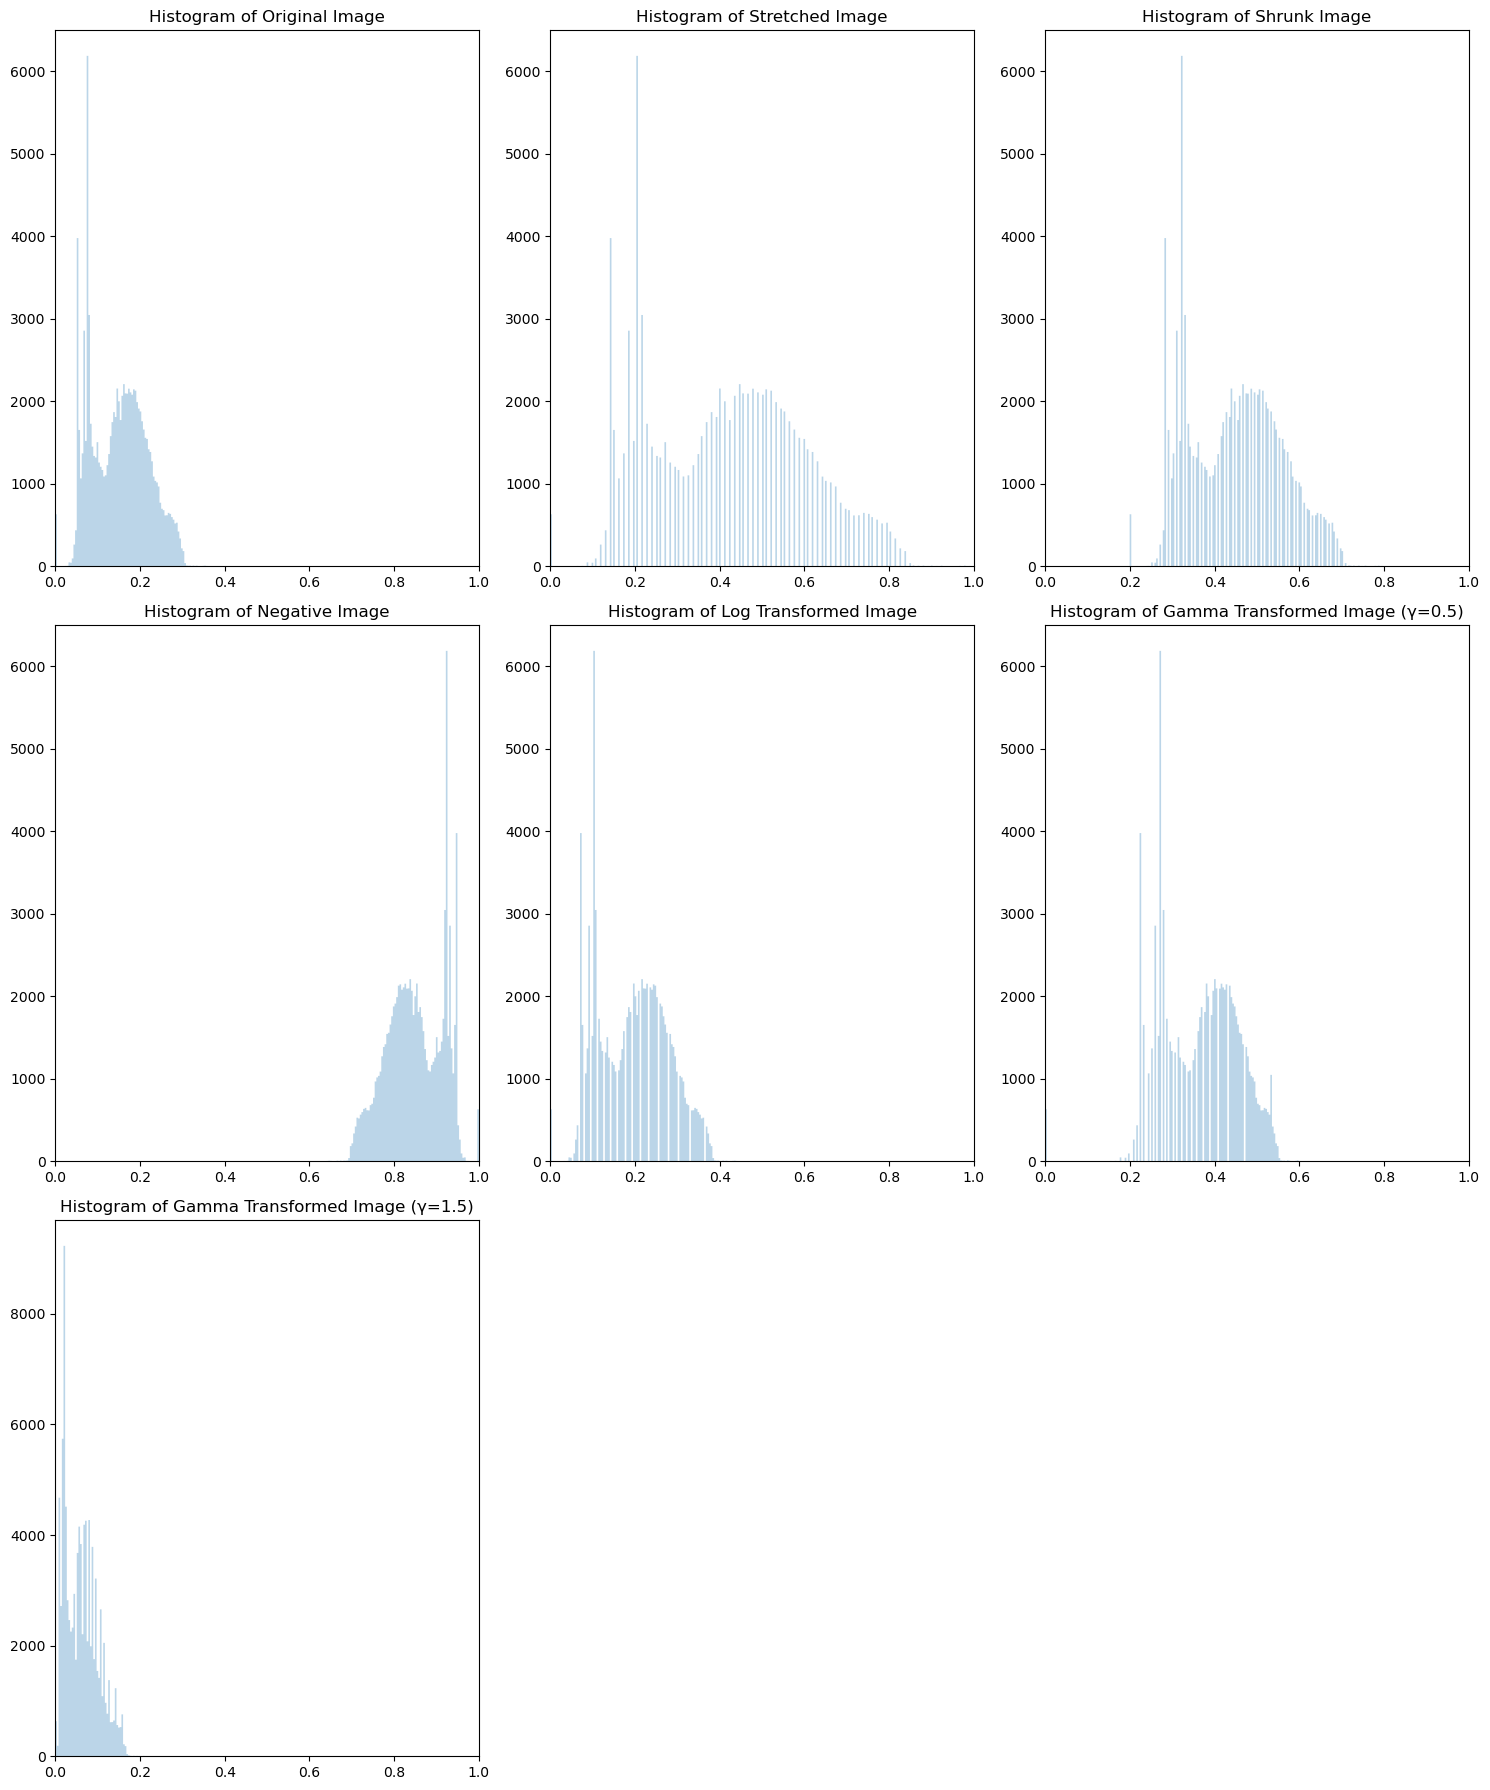

In [6]:
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

# Function to plot histogram
def plot_histogram(image, ax, title):
    ax.hist(image.ravel(), bins=256, range=[0, 1], histtype='stepfilled', alpha=0.3)
    ax.set_title(title)
    ax.set_xlim([0, 1])

# Create a larger grid to accommodate all subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 18))  # Change to 3x3 grid

# Plot histograms for each processed image
plot_histogram(image, axes[0, 0], 'Histogram of Original Image')
plot_histogram(stretched_image, axes[0, 1], 'Histogram of Stretched Image')
plot_histogram(shrunk_image, axes[0, 2], 'Histogram of Shrunk Image')
plot_histogram(negative_image, axes[1, 0], 'Histogram of Negative Image')
plot_histogram(log_transformed_image, axes[1, 1], 'Histogram of Log Transformed Image')
plot_histogram(gamma_transformed_05, axes[1, 2], 'Histogram of Gamma Transformed Image (γ=0.5)')
plot_histogram(gamma_transformed_15, axes[2, 0], 'Histogram of Gamma Transformed Image (γ=1.5)')

# Hide the remaining subplots
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust subgraph parameters automaticly
plt.tight_layout()
plt.show()


### (3) Image Histogram Equalization 	
(a) Load the image 'beans.png'.  

(b) Perform histogram equalization of the image. (Tips: ``skimage.exposure.equalize_hist``) 

(c) Display the original image, the equalized image, the histogram of the original image, and the equalized image.  

(d) Answer the question: What are their differences?


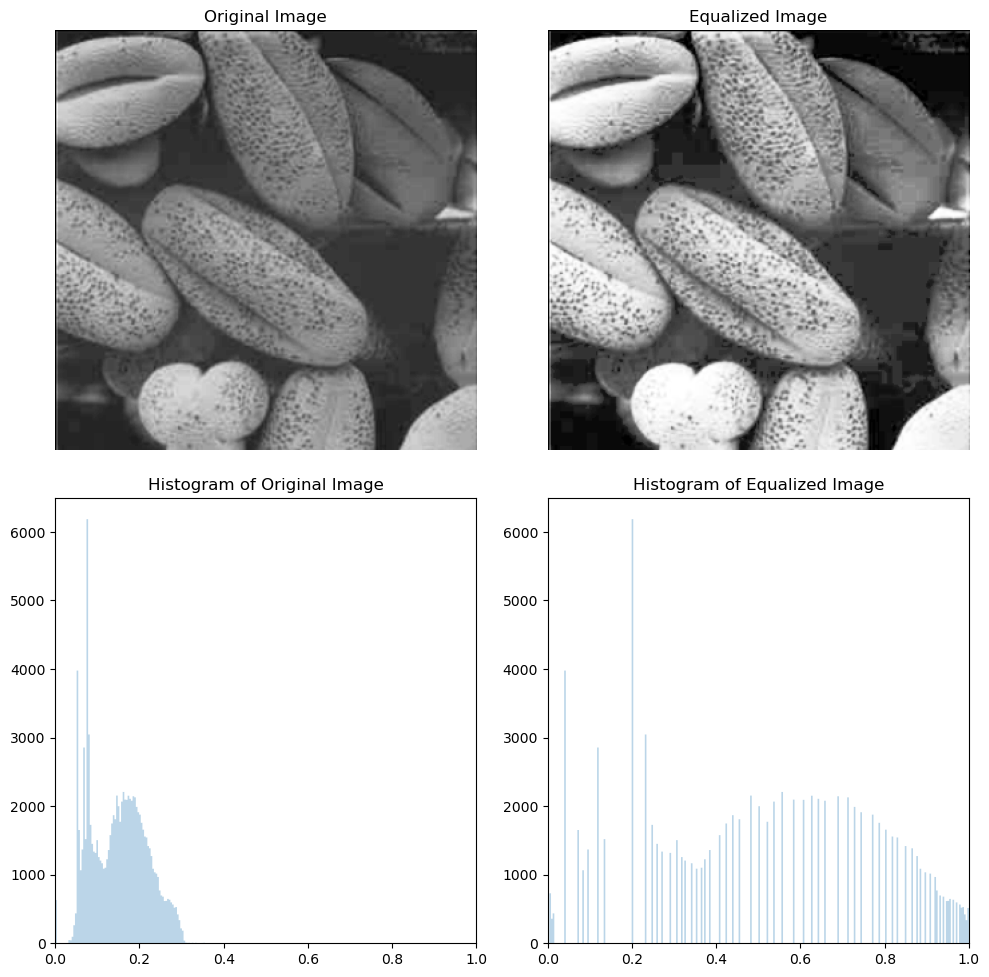

In [8]:
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

# (a) Load the image 'beans.png'.
image = io.imread(r"E:\Homework\images\beans.png", as_gray=True)

# (b) Perform histogram equalization of the image.
equalized_image = exposure.equalize_hist(image)

# (c) Display the original image, the equalized image, the histogram of the original image, and the equalized image.
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Display the original and equalized images
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(equalized_image, cmap='gray')
ax[0, 1].set_title('Equalized Image')
ax[0, 1].axis('off')

# Display histograms for the original and equalized images
ax[1, 0].hist(image.ravel(), bins=256, range=[0, 1], histtype='stepfilled', alpha=0.3)
ax[1, 0].set_title('Histogram of Original Image')
ax[1, 0].set_xlim(0, 1)

ax[1, 1].hist(equalized_image.ravel(), bins=256, range=[0, 1], histtype='stepfilled', alpha=0.3)
ax[1, 1].set_title('Histogram of Equalized Image')
ax[1, 1].set_xlim(0, 1)

# Adjust subgraph parameters automaticly
plt.tight_layout()
plt.show()

# Question
# 1.Visual Appearance: Histogram equalization tends to enhance the contrast of an image. The equalized image will likely appear with more distinct intensity variations compared to the original, which might have areas of local contrast loss.
# 2.Histograms: The histogram of the original image may show concentrated peaks indicating dominant intensity ranges. In contrast, the histogram of the equalized image will be more uniformly distributed across all intensities, indicating a more balanced use of available intensity spectrum.

### (4) Smoothing Linear Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform smoothing linear filtering to smooth these noised images respectively. (Tips: ``ImageFilter.BLUR``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

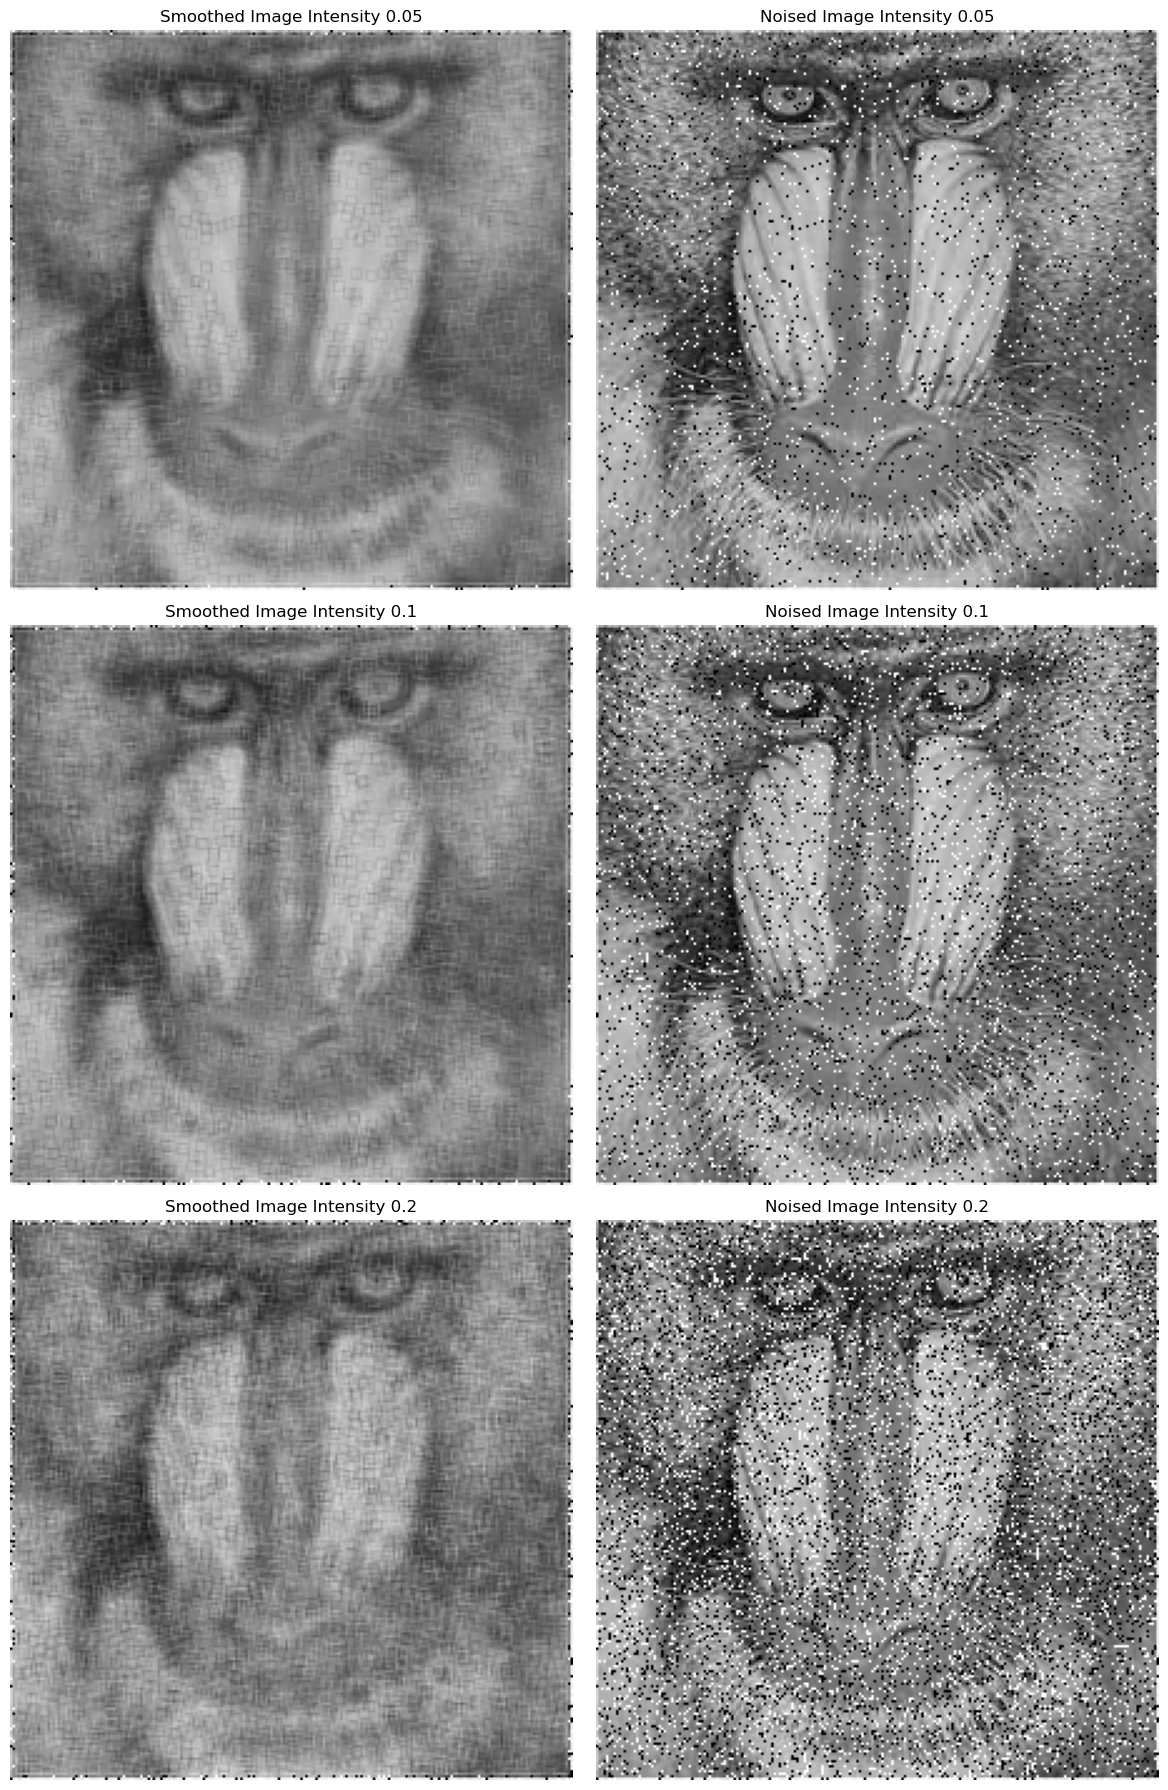

In [16]:
import matplotlib.pyplot as plt
from skimage import io, util
import numpy as np
from PIL import Image, ImageFilter

# (a) Load the image 'mandrill.jpg'.
# Convert the image to PIL format after loading because ImageFilter works with PIL Image objects
image_pil = Image.open("E:\Homework\images\mandrill.jpg").convert('L')  # Convert to grayscale

# (b) Add salt & pepper noise with different intensities.
intensities = [0.05, 0.1, 0.2]  # Different intensities of noise
noised_images = [util.random_noise(np.array(image_pil), mode='s&p', amount=amount) for amount in intensities]
noised_images_pil = [Image.fromarray((255 * img).astype('uint8')) for img in noised_images]  # Convert to PIL images

# (c) Perform smoothing linear filtering using ImageFilter.BLUR
smoothed_images = [img.filter(ImageFilter.BLUR) for img in noised_images_pil]

# (d) Display the images in the same figure with sub-figures.
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

# Display the original image
ax[0, 0].imshow(image_pil, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

for i in range(len(intensities)):
    # Display the noised images
    ax[i, 1].imshow(noised_images[i], cmap='gray')
    ax[i, 1].set_title(f'Noised Image Intensity {intensities[i]}')
    ax[i, 1].axis('off')
    
    # Display the smoothed images
    ax[i, 0].imshow(smoothed_images[i], cmap='gray')
    ax[i, 0].set_title(f'Smoothed Image Intensity {intensities[i]}')
    ax[i, 0].axis('off')

# Adjust subgraph parameters automaticly
plt.tight_layout()
plt.show()

# The way of ImageFilter.BLUR is designed for the PIL format image, it can't be used directly with NumPy arrays. So, we must do some format convert
# Comparison: ImageFilter.BLUR This is a predefined filter in PIL designed to blur an image. The exact kernel size and coefficients used are not specified in the documentation, but it generally applies a simple average across a small neighborhood around each pixel. This method is straightforward to use, requiring no parameters from the user except for applying the filter.Less flexibility, But it is great for quick applications where precise control over the blurring process is not critical.
# Comparison: filters.rank.mean This is a more complex method Provides greater control over the process.Works with numpy arrays, making it better for any scientific computations and numerical operations in Python
# Comparison: Other methods need to be used for various image processing tasks according to specific needs

### (5) Gaussian Smoothing Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add Gaussian noise to image. (Tips: ``skimage.util.random_noise``) 

(c) Perform Gaussian Smoothing Filtering to smooth the noised image. Select kernels with different radius values (at least 3 kinds). (Tips: ``ImageFilter. GaussianBlur``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

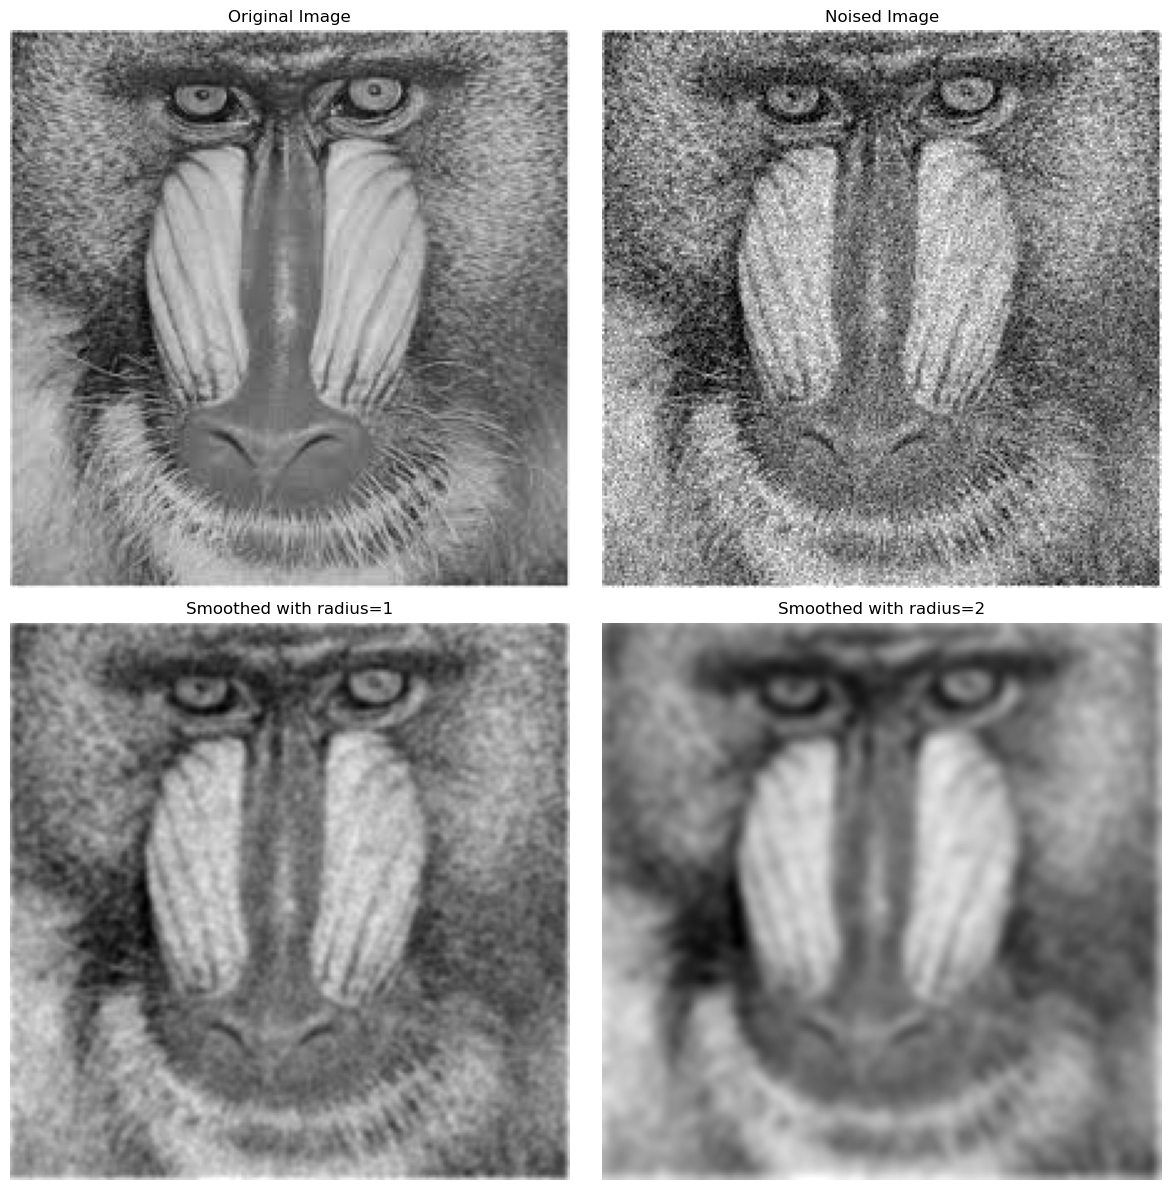

In [19]:
import matplotlib.pyplot as plt
from skimage import io, util
from PIL import Image, ImageFilter
import numpy as np

# (a) Load the image 'mandrill.jpg'.
image = io.imread("E:\Homework\images\mandrill.jpg", as_gray=True)  # Load as grayscale
image_pil = Image.fromarray((image * 255).astype(np.uint8))  # Convert to PIL image for filtering

# (b) Add Gaussian noise to the image.
noised_image = util.random_noise(image, mode='gaussian', var=0.01)
noised_image_pil = Image.fromarray((noised_image * 255).astype(np.uint8))  # Convert to PIL image

# (c) Perform Gaussian Smoothing Filtering to smooth the noised image with different kernels.
radius_values = [1, 2]  # Different radius values for Gaussian blur
smoothed_images = [noised_image_pil.filter(ImageFilter.GaussianBlur(radius=r)) for r in radius_values]

# (d) Display the images in the same figure with sub-figures.
fig, ax = plt.subplots(2, 2, figsize=(12, 12))  # Use a 2x2 grid

# Display the original and noised images
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(noised_image, cmap='gray')
ax[0, 1].set_title('Noised Image')
ax[0, 1].axis('off')

# Display the smoothed images
for i, img in enumerate(smoothed_images):
    ax[1, i].imshow(img, cmap='gray')
    ax[1, i].set_title(f'Smoothed with radius={radius_values[i]}')
    ax[1, i].axis('off')

# Adjust subgraph parameters automaticly
plt.tight_layout()
plt.show()


### (6) Median Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform median filtering to smooth these noised images respectively. Select kernels with different radius parameter values (at least 3 kinds). (Tips: ``ImageFilter.MedianFilter``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

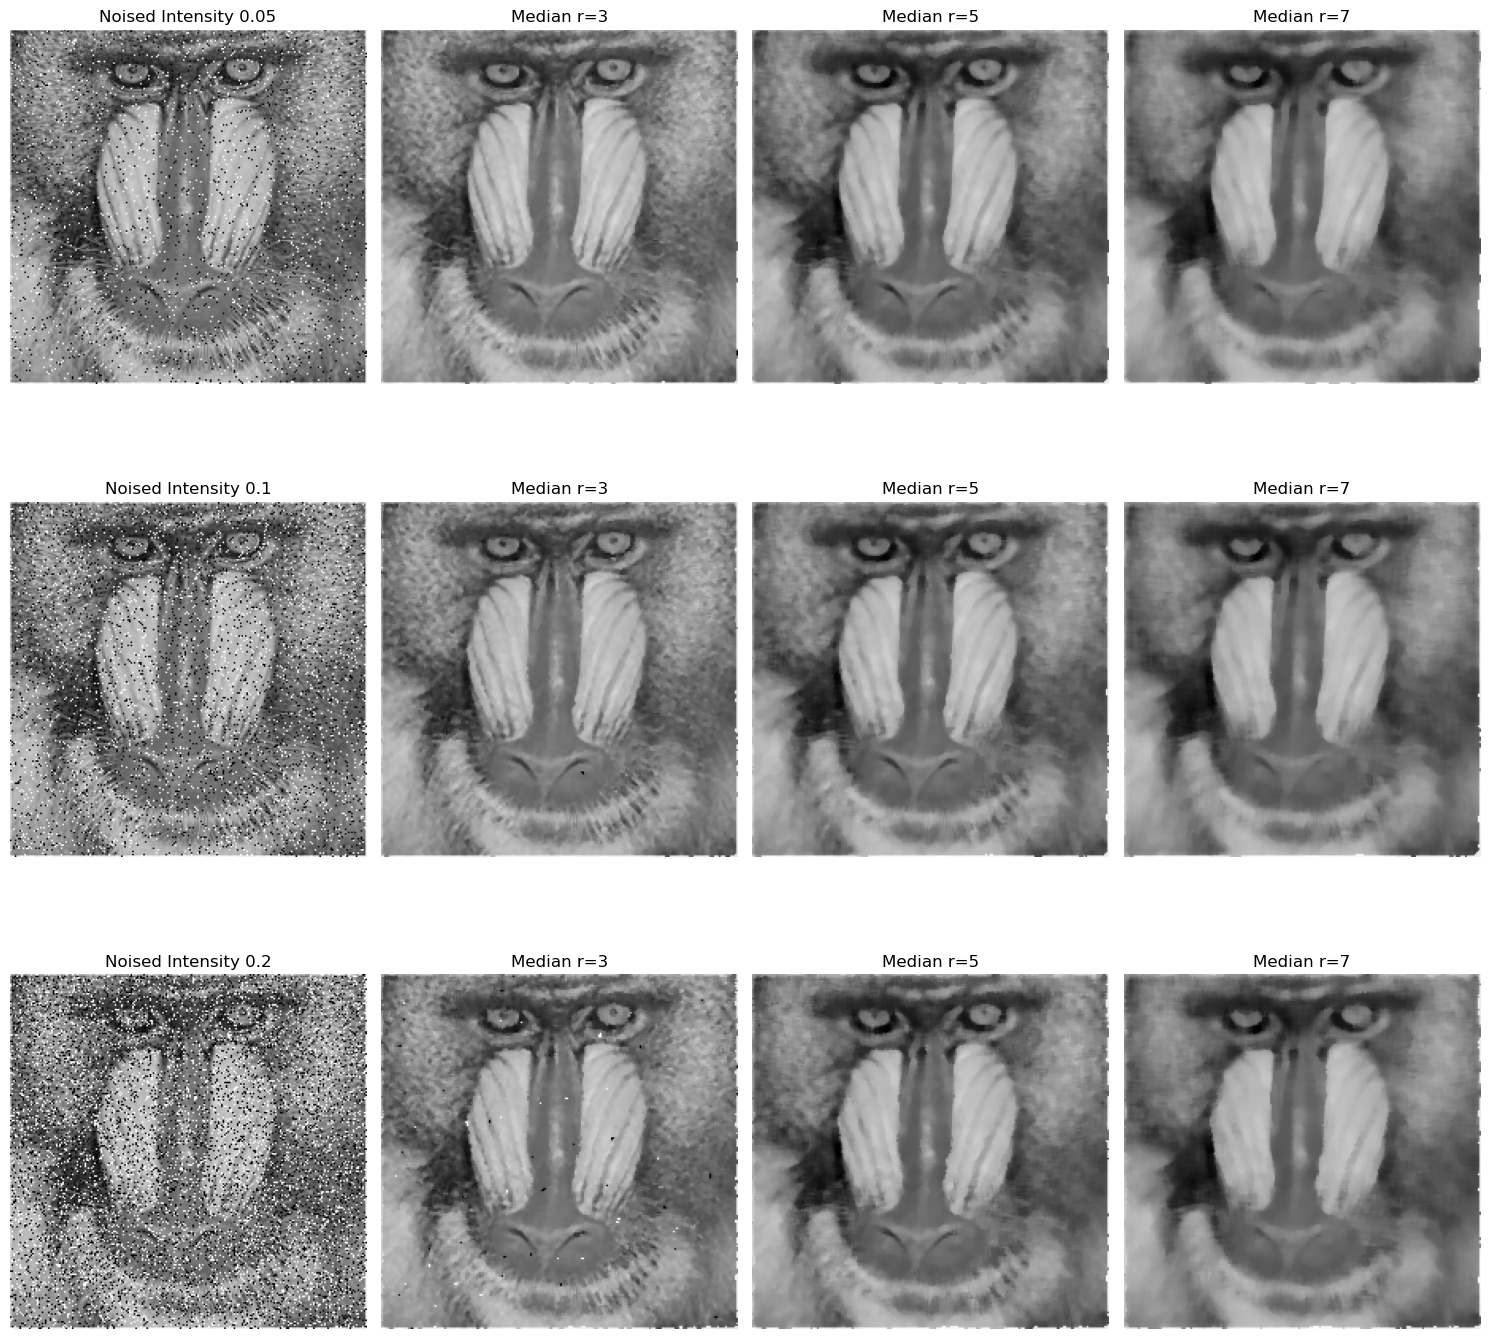

In [2]:
import matplotlib.pyplot as plt
from skimage import io, util
from PIL import Image, ImageFilter
import numpy as np

# (a) Load the image 'mandrill.jpg'.
image = io.imread("E:\Homework\images\mandrill.jpg", as_gray=True)  # Load as grayscale for simplicity
image_pil = Image.fromarray((image * 255).astype(np.uint8))  # Convert to PIL image for filtering

# (b) Add salt & pepper noise with different intensities.
intensities = [0.05, 0.1, 0.2]  # Different intensities of salt & pepper noise
noised_images = [util.random_noise(image, mode='s&p', amount=amount) for amount in intensities]
noised_images_pil = [Image.fromarray((255 * img).astype('uint8')) for img in noised_images]

# (c) Perform median filtering to smooth these noised images respectively.
# Select different radius values for the median filter
radius_values = [3, 5, 7]  # Different radius values for the median filter
smoothed_images = []
for noised_image_pil in noised_images_pil:
    smoothed_for_one_intensity = [noised_image_pil.filter(ImageFilter.MedianFilter(size=radius)) for radius in radius_values]
    smoothed_images.append(smoothed_for_one_intensity)

# (d) Display the images in the same figure with sub-figures.
fig, axes = plt.subplots(len(intensities), len(radius_values) + 1, figsize=(15, 15))

for i in range(len(intensities)):
    # Show noised images
    axes[i, 0].imshow(noised_images[i], cmap='gray')
    axes[i, 0].set_title(f'Noised Intensity {intensities[i]}')
    axes[i, 0].axis('off')
    
    # Show smoothed images for each radius
    for j in range(len(radius_values)):
        axes[i, j + 1].imshow(smoothed_images[i][j], cmap='gray')
        axes[i, j + 1].set_title(f'Median r={radius_values[j]}')
        axes[i, j + 1].axis('off')

# Adjust subgraph parameters automaticly
plt.tight_layout()
plt.show()


### (7)	 Sharpening Filtering.	 
(a) Load the image 'lena.jpg', convert it to grayscale. 

(b) Perform sharpening spatial filtering to enhance the image with different parameters (at least 3 kinds). (Tips: ``skimage.filters.laplace``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

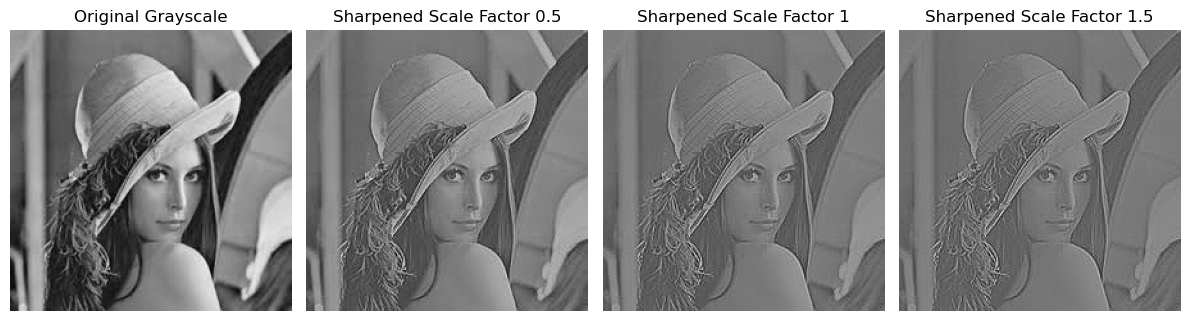

In [3]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, img_as_float
import numpy as np

# (a) Load the image 'lena.jpg', convert it to grayscale.
image = io.imread("E:\Homework\images\lena.jpg")
image_gray = color.rgb2gray(image)  # Convert the image to grayscale

# (b) Perform sharpening spatial filtering to enhance the image with different parameters.
laplacian_image = filters.laplace(image_gray)
scale_factors = [0.5, 1, 1.5]  # Different scaling factors for sharpening effect
sharpened_images = [img_as_float(image_gray) + scale * laplacian_image for scale in scale_factors]

# (c) Display the images in the same figure with sub-figures.
fig, axes = plt.subplots(1, len(scale_factors) + 1, figsize=(12, 6))

# Show the original grayscale image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')

# Show the sharpened images with different parameters
for i, img in enumerate(sharpened_images):
    axes[i + 1].imshow(img, cmap='gray')
    axes[i + 1].set_title(f'Sharpened Scale Factor {scale_factors[i]}')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()


### (8)	Face Detection and Processing with OpenCV. (``Bonus Practice``)
Load the image 'exp2_7.jpg'. 

(a) The face region is detected and marked with a <font style="color:green;">green</font></center> rectangle.(Tips: You may use``cv2.CascadeClassifier``, or ``cv2.dnn.readNetFromCaffe``, or [``MTCNN``](https://github.com/timesler/facenet-pytorch))

(b) Perform Gaussian smoothing filtering for the background region. Some examples of the generated results are shown in the figure below.
 
![result1](./images/exp2_7_1.png) 
<center><font style="color:red;">** Figure 1. The result of cv2.CascadeClassifier ** </font></center>

![result2](./images/exp2_7_2.png) 
<center><font style="color:red;">** Figure 2. The result of cv2.dnn.readNetFromCaffe ** </font></center>

![result3](./images/exp2_7_3.png) 
<center><font style="color:red;">** Figure 3. The result of MTCNN ** </font></center>

In [ ]:
# So difficult 

### (9)	Face Detection with Laptop Camera. (``Bonus Practice``)
(a) Load video stream from the laptop camera.

(b) Use a face detection model to detect images captured by the camera.

(c) Mark the face region with a <font style="color:green;">green</font></center> rectangle to achieve real-time detection as good as possible.

(d) Perform Gaussian smoothing filtering for the background region.

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.